# 現代ポートフォリオ理論
株の期待リターンをそのままで、リスクを小さくする方法

平均:1.040345908545745,標準偏差：0.10019804688356139


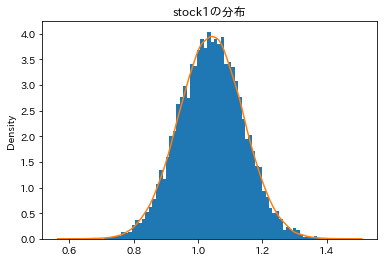

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import japanize_matplotlib

size = int(1e4)
stock1 = rand.normal(1.04,0.1,size)

#正規分布を推定
loc1, scale1 = norm.fit(stock1)
print('平均:{},標準偏差：{}'.format(loc1, scale1))

sample1 = np.random.normal(loc1, scale1, 100000)

plt.hist(stock1,bins=70,density=True)
sns.kdeplot(sample1)
plt.title('stock1の分布')
plt.show()

### 同じ期待リターン、標準偏差の株を半分ずつ持つとどうなるか

平均:1.039784132178949,標準偏差：0.07074120161837844


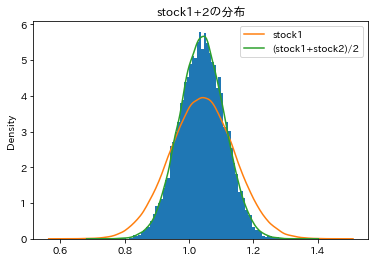

In [2]:
stock2 = rand.normal(1.04,0.1,size)
stock_same=(stock1+stock2)/2

#正規分布を推定
loc2, scale2 = norm.fit(stock_same)
print('平均:{},標準偏差：{}'.format(loc2, scale2))

sample2 = np.random.normal(loc2, scale2, 100000)

plt.hist(stock_same,bins=70,density=True)
sns.kdeplot(sample1,label='stock1')
sns.kdeplot(sample2,label='(stock1+stock2)/2')
plt.title('stock1+2の分布')
plt.legend()
plt.show()

- リターンがそのままで、標準偏差が小さくなることがわかる

### 相関係数が0出ない場合はどうなるか

In [3]:
# 相関係数と分布の影響
rho_in = -0.5

#指定した相関係数の正規分布を作成する式
stock3 = rho_in * stock1 + (1 - rho_in ** 2) ** 0.5 * stock2
stock3 = stock3-stock3.mean()+1.04

#分散、相関係数を計算
variance = np.var(stock1)
rho_out = np.corrcoef(stock1, stock3)[1][0]

#うまく作成できたことを確認
print("variance: {}, correlation: {}".format(variance, rho_out))

variance: 0.010039648599280367, correlation: -0.5033464464384038


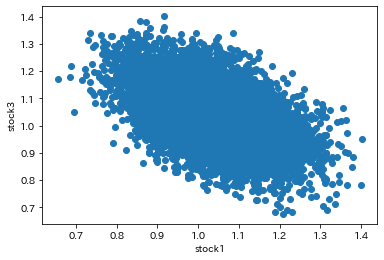

In [4]:
#散布図作成
plt.scatter(stock1,stock3)
plt.xlabel('stock1')
plt.ylabel('stock3')
plt.show()

平均:1.0401729542728724,標準偏差：0.050110173470083993


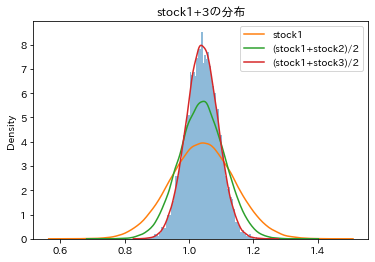

In [5]:
stock_half2=(stock1+stock3)/2

#正規分布を推定
loc3, scale3 = norm.fit(stock_half2)
print('平均:{},標準偏差：{}'.format(loc3, scale3))

sample3 = np.random.normal(loc3, scale3, 100000)

plt.hist(stock_half2,bins=70,density=True,alpha=0.5)
sns.kdeplot(sample1,label='stock1')
sns.kdeplot(sample2,label='(stock1+stock2)/2')
sns.kdeplot(sample3,label='(stock1+stock3)/2')
plt.title('stock1+3の分布')
plt.legend()
plt.show()

- 相関係数が小さい場合は、リターンがそのままで、リスクが小さくなることがわかる